In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.imports import *
from fastai.structured import *

In [4]:
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [5]:
customers = pd.read_excel('Dataset/Dataset.xlsx',
                          sheet_name=0,
                          header=0,
                          index_col=False,
                          keep_default_na=True)

In [6]:
df_raw = customers.copy()

In [7]:
df_test = pd.read_csv('Dataset/TestData.csv')

In [8]:
df_test.drop('FraudFound_P', inplace=True, axis=1)

In [9]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    X=X.values
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c,
            label=l,
            marker=m)
        
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [10]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 50): 
            display(df)

In [12]:
display_all(customers.head())

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21.0,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1.0,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4.0,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455571
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3.0,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65.0,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2.0,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,36.0,Third Party,Sport - Collision,Sport,more than 69000,0,7,14,400,1.0,more than 30,more than 30,1,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339


In [13]:
train_cats(df_raw)

In [14]:
df_raw.Month.cat.set_categories(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                                ordered=True,
                                inplace=True)

In [15]:
df_raw.DayOfWeek.cat.set_categories(['Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                    ordered=True,
                                    inplace=True)

In [16]:
df_raw.DayOfWeekClaimed.cat.set_categories(['Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                           ordered=True,
                                           inplace=True)

In [17]:
df_raw.MonthClaimed.cat.set_categories(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                                       ordered=True,
                                       inplace=True)

In [18]:
apply_cats(df=df_test, trn=df_raw)

In [19]:
df, y, nas = proc_df(df_raw, 'FraudFound_P')
X_test, _, nas = proc_df(df_test, na_dict=nas)
df, y, nas = proc_df(df_raw, 'FraudFound_P', na_dict=nas)

In [20]:
display_all(df.head())

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize,Age_na,DriverRating_na
0,12,5,3,7,2,2,1,1,1,3,21.0,1,6,2,6,1,12,300,1.0,4,3,4,2,4,1,1,1,4,1,3,1994,3,55526.069421,False,False
1,1,3,3,7,2,1,1,4,2,3,34.0,1,5,2,6,2,15,400,4.0,4,3,4,5,5,2,1,1,4,4,1,1994,2,59294.455571,False,False
2,10,5,5,7,2,4,11,2,2,2,47.0,1,5,2,6,3,7,400,3.0,4,3,1,6,7,1,1,1,4,4,1,1994,2,71756.941320,False,False
3,6,2,6,18,1,5,7,1,2,2,65.0,2,3,2,1,4,4,400,2.0,4,3,1,7,8,2,1,1,3,4,1,1994,3,7584.153493,False,False
4,2,1,6,7,2,1,2,3,2,2,36.0,2,5,2,6,7,14,400,1.0,4,3,1,6,6,1,1,1,1,4,1,1994,2,98545.374339,False,False


In [21]:
def error(x, y):
    print(confusion_matrix(x, y))
    print(f1_score(x, y))
    print(classification_report(x, y))
    
def print_score(m):
    result = [error(m.predict(X_train), y_train),
              error(m.predict(X_valid), y_valid),
              m.score(X_train, y_train),
              m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): result.append(m.oob_score_)

In [87]:
X_train, X_valid, y_train, y_valid = train_test_split(df, y, random_state=0, test_size=0.15)

In [24]:
X_train.shape, X_valid.shape

((9830, 35), (1735, 35))

In [25]:
m = RandomForestClassifier(n_estimators=3, n_jobs=-1, max_features=0.5)

m.fit(X_train, y_train)

print_score(m)

[[9215  120]
 [  24  471]]
0.8674033149171271
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9335
           1       0.80      0.95      0.87       495

    accuracy                           0.99      9830
   macro avg       0.90      0.97      0.93      9830
weighted avg       0.99      0.99      0.99      9830

[[1599   74]
 [  42   20]]
0.2564102564102564
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1673
           1       0.21      0.32      0.26        62

    accuracy                           0.93      1735
   macro avg       0.59      0.64      0.61      1735
weighted avg       0.95      0.93      0.94      1735



In [26]:
fi = rf_feat_importance(m, df); fi[:10]

,cols,imp
15,PolicyNumber,0.135051
32,ClaimSize,0.093159
10,Age,0.080743
0,Month,0.056027
6,MonthClaimed,0.055724
16,RepNumber,0.055416
1,WeekOfMonth,0.042617
31,BasePolicy,0.040348
5,DayOfWeekClaimed,0.039187
3,Make,0.038213


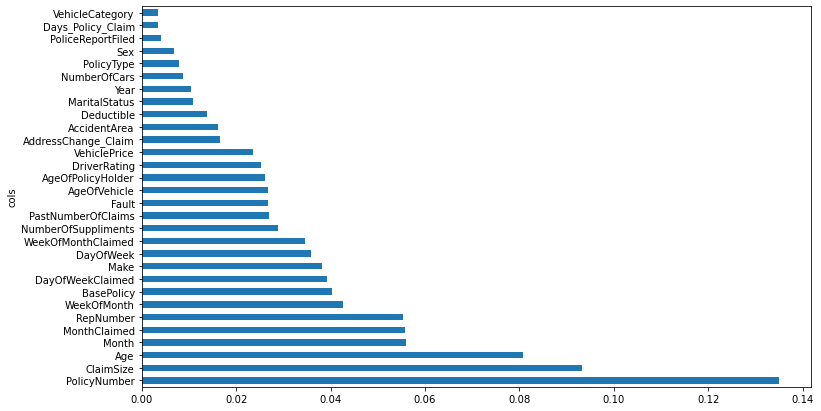

In [27]:
def plot_fi(fi): 
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

In [28]:
m = RandomForestClassifier(n_estimators=3, n_jobs=-1, max_features=0.5)

m.fit(X_train.drop('PolicyNumber', axis=1), y_train)

result = [error(m.predict(X_train.drop('PolicyNumber', axis=1)), y_train),
          error(m.predict(X_valid.drop('PolicyNumber', axis=1)), y_valid),
          m.score(X_train.drop('PolicyNumber', axis=1), y_train),
          m.score(X_valid.drop('PolicyNumber', axis=1), y_valid)]

print(result)

[[9204  117]
 [  35  474]]
0.8618181818181817
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9321
           1       0.80      0.93      0.86       509

    accuracy                           0.98      9830
   macro avg       0.90      0.96      0.93      9830
weighted avg       0.99      0.98      0.99      9830

[[1579   82]
 [  62   12]]
0.14285714285714288
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1661
           1       0.13      0.16      0.14        74

    accuracy                           0.92      1735
   macro avg       0.54      0.56      0.55      1735
weighted avg       0.93      0.92      0.92      1735

[None, None, 0.9845371312309258, 0.9170028818443804]


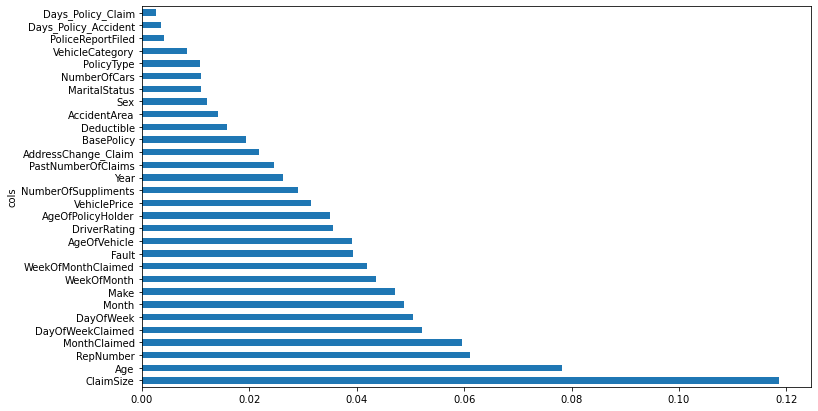

In [29]:
fi = rf_feat_importance(m, df.drop('PolicyNumber', axis=1))
plot_fi(fi[:30]);

In [30]:
m = RandomForestClassifier(n_estimators=1, n_jobs=-1, max_depth=3)

m.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=1, n_jobs=-1)

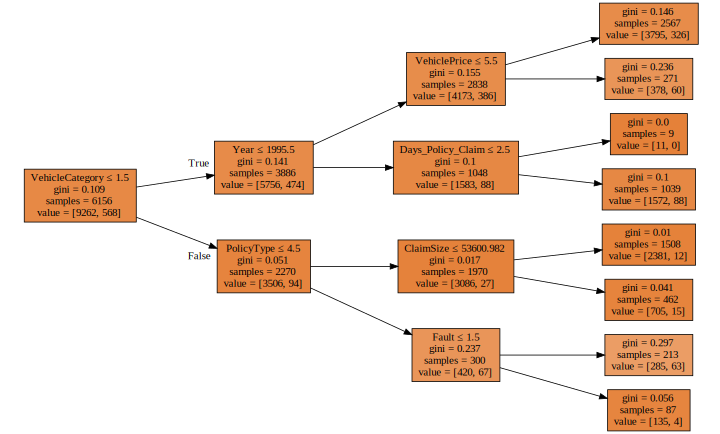

In [31]:
draw_tree(m.estimators_[0], X_valid, precision=3)

In [32]:
import sys
!conda install --yes --prefix {sys.prefix} -c conda-forge lightgbm
import lightgbm as lgb

print("LightGBM Version: {}".format(lgb.__version__))

Solving environment: done

# All requested packages already installed.

LightGBM Version: 3.2.1


/Users/aniket/opt/anaconda3/lib/python3.8/site-packages/imblearn/under_sampling/_prototype_generation/_cluster_centroids.py:120: FutureWarning: 'n_jobs' was deprecated in 0.7 and will be removed in 0.9
  warnings.warn(


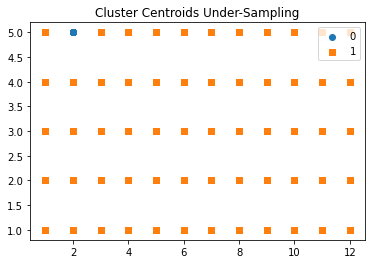

In [33]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(sampling_strategy={0: 6650}, n_jobs=-1)

X_cc_full, y_cc_full = cc.fit_resample(df, y)

plot_2d_space(X_cc_full, y_cc_full, 'Cluster Centroids Under-Sampling')

In [34]:
lgb_train = lgb.Dataset(X_cc_full, y_cc_full, free_raw_data=False)

In [35]:
parameters = {'num_leaves': 2**5,
              'learning_rate': 0.05,
              'is_unbalance': True,
              'min_split_gain': 0.03,
              'min_child_weight': 1,
              'reg_lambda': 1,
              'subsample': 1,
              'objective':'binary',
              #'device': 'gpu', #Comment this line if you are not using GPU
              'task': 'train'}

num_rounds = 500

In [36]:
%%time
clf = lgb.train(parameters, lgb_train, num_boost_round=num_rounds)

[LightGBM] [Info] Number of positive: 685, number of negative: 6650
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 936
[LightGBM] [Info] Number of data points in the train set: 7335, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.093388 -> initscore=-2.272953
[LightGBM] [Info] Start training from score -2.272953
CPU times: user 6.36 s, sys: 1.38 s, total: 7.75 s
Wall time: 1.32 s


In [37]:
#With Policy Number
y_prob = clf.predict(X_valid)

y_pred = np.array([0 if i<0.45 else 1 for i in y_prob])

error(y_pred, y_valid)

[[1501    0]
 [ 140   94]]
0.5731707317073171
              precision    recall  f1-score   support

           0       0.91      1.00      0.96      1501
           1       1.00      0.40      0.57       234

    accuracy                           0.92      1735
   macro avg       0.96      0.70      0.76      1735
weighted avg       0.93      0.92      0.90      1735



In [38]:
y_prob = clf.predict(X_test)

y_pred_test = np.array([0 if i<0.45 else 1 for i in y_prob])

In [39]:
y_pred_df = pd.DataFrame(y_pred_test.reshape(-1, 1))

In [40]:
y_pred_df.columns = ['FraudFound_P']

In [41]:
y_pred_df.to_csv('test_results.csv', index=False)

In [42]:
lgb_train = lgb.Dataset(X_cc_full.drop('PolicyNumber', axis=1), y_cc_full, free_raw_data=False)

In [43]:
%%time
clf = lgb.train(parameters, lgb_train, num_boost_round=num_rounds)

[LightGBM] [Info] Number of positive: 685, number of negative: 6650
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 681
[LightGBM] [Info] Number of data points in the train set: 7335, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.093388 -> initscore=-2.272953
[LightGBM] [Info] Start training from score -2.272953
CPU times: user 5.97 s, sys: 1.37 s, total: 7.34 s
Wall time: 1.27 s


In [44]:
#No Policy Number
print(X_valid.shape)
y_prob = clf.predict(X_valid.drop('PolicyNumber', axis=1))

y_pred = np.array([0 if i<0.5 else 1 for i in y_prob])

error(y_pred, y_valid)

(1735, 35)
[[1367    0]
 [ 274   94]]
0.4069264069264069
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1367
           1       1.00      0.26      0.41       368

    accuracy                           0.84      1735
   macro avg       0.92      0.63      0.66      1735
weighted avg       0.87      0.84      0.80      1735



In [45]:
def gbm_feat_importance(m, df):
    return pd.DataFrame({'cols': df.columns, 'imp': m.feature_importance()}).sort_values('imp', ascending=False)

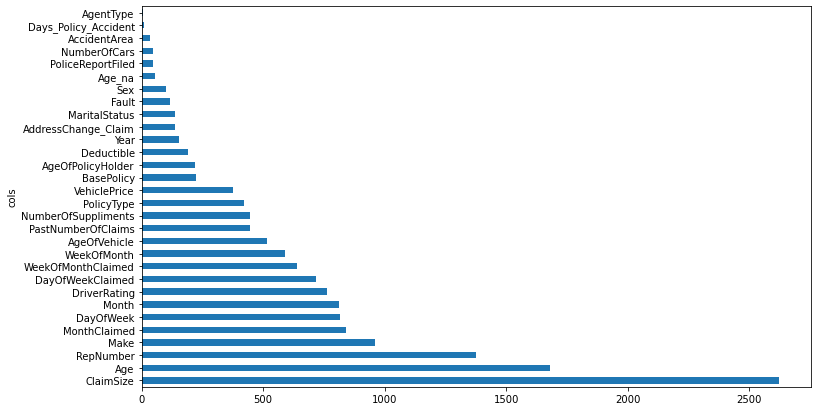

In [46]:
#Without using Policy Number
fi = gbm_feat_importance(clf, df.drop('PolicyNumber', axis=1))
plot_fi(fi[:30]);

In [48]:
(df_raw[(df_raw['FraudFound_P'] == 1) & (df_raw['Month'] == 'Dec')] ).shape
(df_raw[(df_raw['FraudFound_P'] == 0) & (df_raw['Month'] == 'Dec')] ).shape

(925, 34)

<AxesSubplot:>

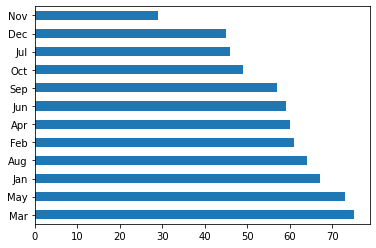

In [49]:
df_raw['Month'][df_raw['FraudFound_P'] == 1].value_counts().plot(kind='barh')

In [50]:
df_raw['RepNumber'].value_counts()

7     800
9     760
1     754
16    739
3     733
5     729
15    729
10    728
2     714
14    713
12    708
6     703
11    697
4     696
8     681
13    681
Name: RepNumber, dtype: int64

In [51]:
(df_raw['ClaimSize'][df_raw['FraudFound_P'] == 0]).value_counts()

98545.374339    20
69101.981954    19
77167.223246    18
58488.924392    18
85555.916236    18
                ..
14887.379776     1
19388.480868     1
20994.079097     1
18225.561061     1
3127.750681      1
Name: ClaimSize, Length: 3294, dtype: int64

In [52]:
import seaborn as sns

/Users/aniket/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


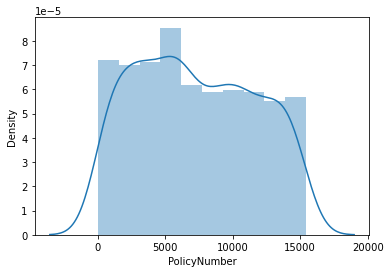

In [53]:
fraud = customers.loc[customers["FraudFound_P"]==1]
normal = customers.loc[customers["FraudFound_P"]==0]
sns.distplot(fraud.PolicyNumber)
plt.show()

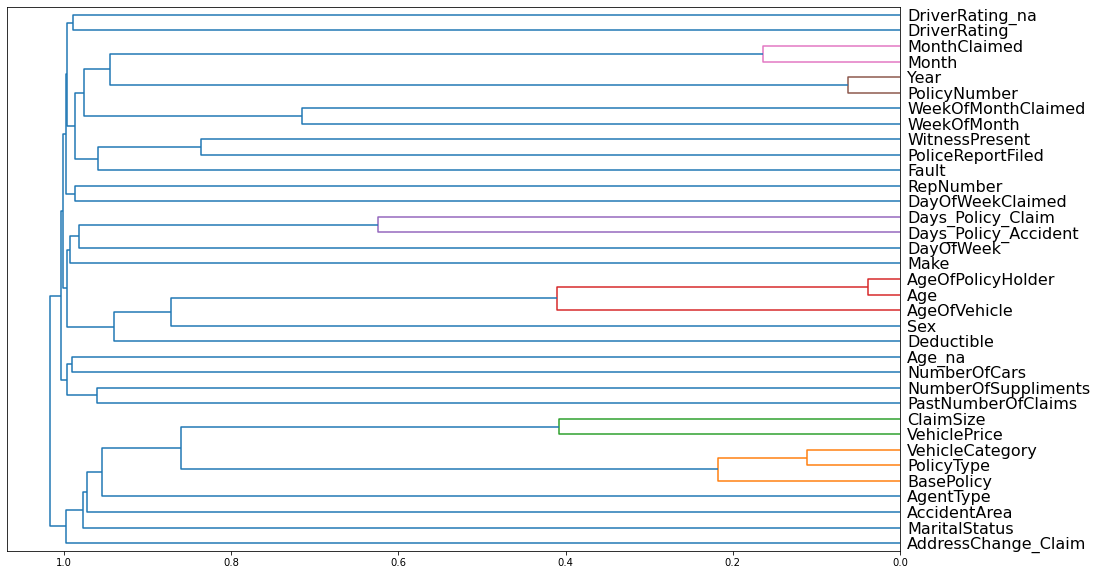

In [54]:
from scipy.cluster import hierarchy as hc

correlation = np.round(scipy.stats.spearmanr(df).correlation, 4)
correlation_condensed = hc.distance.squareform(1-correlation)
z = hc.linkage(correlation_condensed, method='average')
fig = plt.figure(figsize=(16, 10))

dendrogram = hc.dendrogram(z, labels=df.columns,
                           orientation='left',
                           leaf_font_size=16)

plt.show() 

In [55]:
from sklearn.svm import OneClassSVM

m = OneClassSVM(gamma='scale', degree=3, kernel='rbf')

m.fit(X_train)

y_prob = m.predict(X_valid)

y_prob[y_prob==-1].sum()

y_pred = np.array([0 if i==-1 else 1 for i in y_prob])

error(y_pred, y_valid)

[[808  55]
 [833  39]]
0.08074534161490685
              precision    recall  f1-score   support

           0       0.49      0.94      0.65       863
           1       0.41      0.04      0.08       872

    accuracy                           0.49      1735
   macro avg       0.45      0.49      0.36      1735
weighted avg       0.45      0.49      0.36      1735



In [56]:
m = IsolationForest(n_jobs=-1, n_estimators=100, max_features=0.5, bootstrap=True)

m.fit(X_train)

y_prob = m.predict(X_valid)

y_prob[y_prob==1].sum()

y_pred = np.array([1 if i==-1 else 0 for i in y_prob])

error(y_pred, y_valid)

[[1258   70]
 [ 383   24]]
0.09580838323353294
              precision    recall  f1-score   support

           0       0.77      0.95      0.85      1328
           1       0.26      0.06      0.10       407

    accuracy                           0.74      1735
   macro avg       0.51      0.50      0.47      1735
weighted avg       0.65      0.74      0.67      1735



In [57]:
from sklearn.neighbors import LocalOutlierFactor

m = LocalOutlierFactor(novelty=True, n_neighbors=30, algorithm='ball_tree', leaf_size=40, p=5)

m.fit(X_train)

y_prob = m.predict(X_valid)

y_pred = np.array([1 if i==-1 else 0 for i in y_prob])

error(y_pred, y_valid)

[[1632   93]
 [   9    1]]
0.01923076923076923
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1725
           1       0.01      0.10      0.02        10

    accuracy                           0.94      1735
   macro avg       0.50      0.52      0.49      1735
weighted avg       0.99      0.94      0.96      1735



In [58]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTETomek

In [59]:
rus = RandomOverSampler(random_state=42)

X_res, y_res = rus.fit_resample(X_train, y_train)

y_res[y_res == 1].sum()

9239

In [60]:
m = RandomForestClassifier(n_estimators=3, n_jobs=-1, max_features=0.5)

m.fit(X_res, y_res)

print_score(m)

[[9188    0]
 [  51  591]]
0.9586374695863746
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9188
           1       1.00      0.92      0.96       642

    accuracy                           0.99      9830
   macro avg       1.00      0.96      0.98      9830
weighted avg       0.99      0.99      0.99      9830

[[1597   73]
 [  44   21]]
0.2641509433962264
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1670
           1       0.22      0.32      0.26        65

    accuracy                           0.93      1735
   macro avg       0.60      0.64      0.61      1735
weighted avg       0.95      0.93      0.94      1735



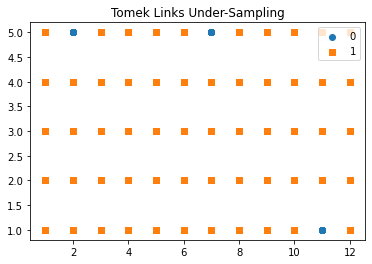

In [63]:
tl = TomekLinks(sampling_strategy='not majority')

X_tl, y_tl = tl.fit_resample(X_train, y_train)

plot_2d_space(X_tl, y_tl, 'Tomek Links Under-Sampling')

In [64]:
m = RandomForestClassifier(n_estimators=3, n_jobs=-1, max_features=0.5)

m.fit(X_tl, y_tl)

print_score(m)

[[9224  381]
 [  15  210]]
0.5147058823529412
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      9605
           1       0.36      0.93      0.51       225

    accuracy                           0.96      9830
   macro avg       0.68      0.95      0.75      9830
weighted avg       0.98      0.96      0.97      9830

[[1630   89]
 [  11    5]]
0.0909090909090909
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1719
           1       0.05      0.31      0.09        16

    accuracy                           0.94      1735
   macro avg       0.52      0.63      0.53      1735
weighted avg       0.98      0.94      0.96      1735



/Users/aniket/opt/anaconda3/lib/python3.8/site-packages/imblearn/under_sampling/_prototype_generation/_cluster_centroids.py:120: FutureWarning: 'n_jobs' was deprecated in 0.7 and will be removed in 0.9
  warnings.warn(


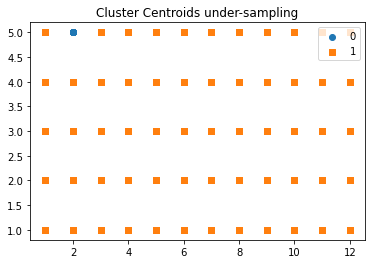

In [65]:
cc = ClusterCentroids(sampling_strategy={0: 6000}, n_jobs=-1)

X_cc, y_cc = cc.fit_resample(X_train, y_train)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

In [66]:
m = RandomForestClassifier(n_estimators=3, n_jobs=-1, max_features=0.5)

m.fit(X_cc, y_cc)

print_score(m)

[[8674  110]
 [ 565  481]]
0.5876603543066586
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      8784
           1       0.81      0.46      0.59      1046

    accuracy                           0.93      9830
   macro avg       0.88      0.72      0.78      9830
weighted avg       0.93      0.93      0.92      9830

[[1515   69]
 [ 126   25]]
0.20408163265306123
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1584
           1       0.27      0.17      0.20       151

    accuracy                           0.89      1735
   macro avg       0.59      0.56      0.57      1735
weighted avg       0.87      0.89      0.88      1735



/Users/aniket/opt/anaconda3/lib/python3.8/site-packages/imblearn/under_sampling/_prototype_generation/_cluster_centroids.py:120: FutureWarning: 'n_jobs' was deprecated in 0.7 and will be removed in 0.9
  warnings.warn(


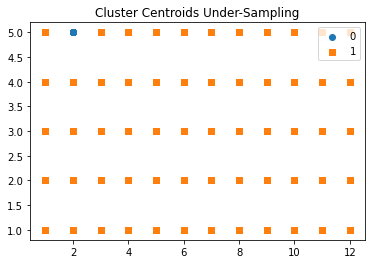

In [88]:
cc = ClusterCentroids(sampling_strategy={0:6000}, n_jobs=4)

X_cc, y_cc = cc.fit_resample(X_train.drop('PolicyNumber', axis=1), y_train)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids Under-Sampling')

In [69]:
m = RandomForestClassifier(n_estimators=3, n_jobs=-1, max_features=0.5)

m.fit(X_cc_full, y_cc_full)

print_score(m)

[[8510   94]
 [ 729  497]]
0.5470555861309851
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      8604
           1       0.84      0.41      0.55      1226

    accuracy                           0.92      9830
   macro avg       0.88      0.70      0.75      9830
weighted avg       0.91      0.92      0.90      9830

[[1495   20]
 [ 146   74]]
0.47133757961783446
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1515
           1       0.79      0.34      0.47       220

    accuracy                           0.90      1735
   macro avg       0.85      0.66      0.71      1735
weighted avg       0.90      0.90      0.89      1735



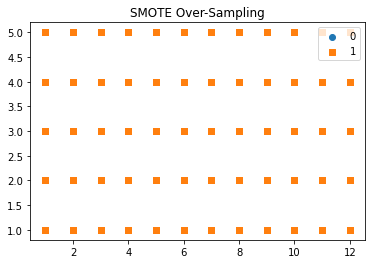

In [79]:
smote = SMOTE(sampling_strategy='not majority')

X_sm, y_sm = smote.fit_resample(X_train, y_train)

plot_2d_space(X_sm, y_sm, 'SMOTE Over-Sampling')

In [71]:
m = RandomForestClassifier(n_estimators=3, n_jobs=-1, max_features=0.5)

m.fit(X_sm, y_sm)

print_score(m)

[[9120   60]
 [ 119  531]]
0.8557614826752619
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9180
           1       0.90      0.82      0.86       650

    accuracy                           0.98      9830
   macro avg       0.94      0.91      0.92      9830
weighted avg       0.98      0.98      0.98      9830

[[1508   70]
 [ 133   24]]
0.19123505976095617
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1578
           1       0.26      0.15      0.19       157

    accuracy                           0.88      1735
   macro avg       0.59      0.55      0.56      1735
weighted avg       0.86      0.88      0.87      1735



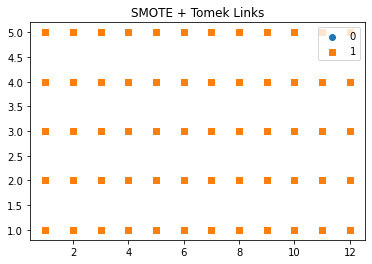

In [72]:
smt = SMOTETomek(sampling_strategy='auto')

X_smt, y_smt = smt.fit_resample(X_train, y_train)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek Links')

In [73]:
(y_smt[y_smt == 1]).shape

(8298,)

In [74]:
m = RandomForestClassifier(n_estimators=3, n_jobs=-1, max_features=0.5)

m.fit(X_smt, y_smt)

print_score(m)

[[9071   78]
 [ 168  513]]
0.8066037735849056
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      9149
           1       0.87      0.75      0.81       681

    accuracy                           0.97      9830
   macro avg       0.92      0.87      0.90      9830
weighted avg       0.97      0.97      0.97      9830

[[1526   69]
 [ 115   25]]
0.21367521367521367
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1595
           1       0.27      0.18      0.21       140

    accuracy                           0.89      1735
   macro avg       0.60      0.57      0.58      1735
weighted avg       0.88      0.89      0.88      1735

